In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import numpy as np 
import datetime as dt
%matplotlib inline

In [37]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2019, 10, 10)
dax=pd.read_csv('DAX_Y.csv')

In [38]:
dax['Date']=pd.to_datetime(dax['Date'])
dax['D']=dax['Date'].dt.dayofweek
dax.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close,D
0,2006-01-02,5451.569824,5409.279785,5410.240234,5449.979980,36148300.0,5449.979980,0
1,2006-01-03,5496.459961,5440.740234,5451.339844,5460.680176,105746000.0,5460.680176,1
2,2006-01-04,5523.669922,5477.600098,5494.459961,5523.620117,108624100.0,5523.620117,2
3,2006-01-05,5526.410156,5502.250000,5521.859863,5516.529785,102413000.0,5516.529785,3
4,2006-01-06,5537.580078,5507.919922,5521.520020,5536.319824,90224400.0,5536.319824,4
5,2006-01-09,5553.549805,5532.839844,5543.339844,5537.109863,96620300.0,5537.109863,0
6,2006-01-10,5528.279785,5482.180176,5528.060059,5494.709961,108573800.0,5494.709961,1
7,2006-01-11,5537.479980,5515.669922,5524.200195,5532.890137,106460500.0,5532.890137,2
8,2006-01-12,5553.479980,5516.240234,5533.250000,5542.129883,137053500.0,5542.129883,3
9,2006-01-13,5531.729980,5463.779785,5531.729980,5483.089844,131097600.0,5483.089844,4


In [39]:
for i in range(1,6):
    dax['High_pct_'+str(i)]=dax['High'].pct_change(periods=i)
    dax['Low_pct_'+str(i)]=dax['Low'].pct_change(periods=i)
    dax['Open_pct_'+str(i)]=dax['Open'].pct_change(periods=i)
    dax['Close_pct_'+str(i)]=dax['Close'].pct_change(periods=i)
    dax['Volume_pct_'+str(i)]=dax['Volume'].pct_change(periods=i)
dax.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,D,High_pct_1,Low_pct_1,...,High_pct_4,Low_pct_4,Open_pct_4,Close_pct_4,Volume_pct_4,High_pct_5,Low_pct_5,Open_pct_5,Close_pct_5,Volume_pct_5
0,2006-01-02,5451.569824,5409.279785,5410.240234,5449.979980,36148300.0,5449.979980,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-03,5496.459961,5440.740234,5451.339844,5460.680176,105746000.0,5460.680176,1,0.008234,0.005816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-04,5523.669922,5477.600098,5494.459961,5523.620117,108624100.0,5523.620117,2,0.004950,0.006775,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-05,5526.410156,5502.250000,5521.859863,5516.529785,102413000.0,5516.529785,3,0.000496,0.004500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-06,5537.580078,5507.919922,5521.520020,5536.319824,90224400.0,5536.319824,4,0.002021,0.001030,...,0.015777,0.018235,0.020568,0.015842,1.495951,NaN,NaN,NaN,NaN,NaN


In [40]:
def check_change(Min,Max):
   
    if (Max>0.04):
        return 2
    if (Min<-0.04):
        return 1
    
    return 0

dax['y']=0
dax['Max']=dax[["Close_pct_1", "Close_pct_2","Close_pct_3","Close_pct_4","Close_pct_5"]].max(axis=1)
dax['Min']=dax[["Close_pct_1", "Close_pct_2","Close_pct_3","Close_pct_4","Close_pct_5"]].min(axis=1)


dax['y']=dax.apply(lambda x: check_change(x['Min'],x['Max']),axis=1)
dax['y']=dax['y'].shift(-5)
dax.dropna(inplace=True)
dax.head(20)

,Date,High,Low,Open,Close,Volume,Adj Close,D,High_pct_1,Low_pct_1,...,Close_pct_4,Volume_pct_4,High_pct_5,Low_pct_5,Open_pct_5,Close_pct_5,Volume_pct_5,y,Max,Min
5,2006-01-09,5553.549805,5532.839844,5543.339844,5537.109863,96620300.0,5537.109863,0,0.002884,0.004524,...,0.013996,-0.086298,0.018707,0.022842,0.024601,0.015987,1.672886,0.0,0.015987,0.000143
6,2006-01-10,5528.279785,5482.180176,5528.060059,5494.709961,108573800.0,5494.709961,1,-0.004550,-0.009156,...,-0.005234,-0.000463,0.005789,0.007617,0.014074,0.006232,0.026741,0.0,0.006232,-0.007657
7,2006-01-11,5537.479980,5515.669922,5524.200195,5532.890137,106460500.0,5532.890137,2,0.001664,0.006109,...,0.002966,0.039521,0.002500,0.006950,0.005413,0.001678,-0.019918,0.0,0.006949,-0.000762
8,2006-01-12,5553.479980,5516.240234,5533.250000,5542.129883,137053500.0,5542.129883,3,0.002889,0.000103,...,0.001049,0.519029,0.004898,0.002543,0.002063,0.004641,0.338243,0.0,0.008630,0.000907
9,2006-01-13,5531.729980,5463.779785,5531.729980,5483.089844,131097600.0,5483.089844,4,-0.003916,-0.009510,...,-0.009756,0.356833,-0.001056,-0.008014,0.001849,-0.009615,0.453017,0.0,-0.002115,-0.010653
10,2006-01-16,5515.259766,5462.540039,5464.979980,5514.640137,61050900.0,5514.640137,0,-0.002977,-0.000227,...,0.003627,-0.437701,-0.006895,-0.012706,-0.014136,-0.004058,-0.368136,0.0,0.005754,-0.004960
11,2006-01-17,5481.859863,5448.870117,5481.859863,5460.160156,96659200.0,5460.160156,1,-0.006056,-0.002502,...,-0.013145,-0.092065,-0.008397,-0.006076,-0.008357,-0.006288,-0.109737,0.0,-0.004182,-0.014790
12,2006-01-18,5426.819824,5363.640137,5419.180176,5395.609863,114225200.0,5395.609863,2,-0.010040,-0.015642,...,-0.026437,-0.166565,-0.019984,-0.027563,-0.019011,-0.024812,0.072935,0.0,-0.011822,-0.026437
13,2006-01-19,5438.910156,5410.290039,5411.339844,5430.839844,105343400.0,5430.839844,3,0.002228,0.008697,...,-0.009529,-0.196451,-0.020630,-0.019207,-0.022032,-0.020081,-0.231370,2.0,0.006529,-0.020081
14,2006-01-20,5447.370117,5344.520020,5433.689941,5349.020020,153096700.0,5349.020020,4,0.001555,-0.012156,...,-0.030033,1.507689,-0.015250,-0.021827,-0.017723,-0.024452,0.167807,2.0,-0.008635,-0.030033


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dax=dax.replace([np.inf, -np.inf], np.nan)
dax=dax.dropna()
X=dax.drop(['Date','y'],axis=1)

scaler.fit(X)
scaled_data = scaler.transform(X)

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'Second Principal Component')

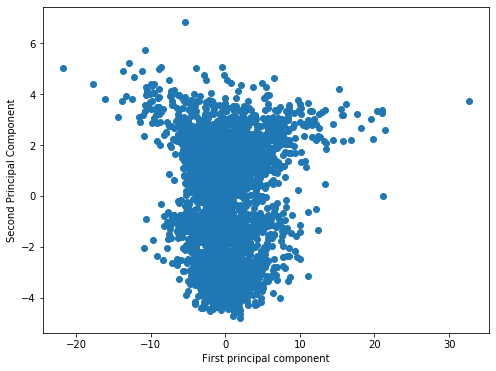

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

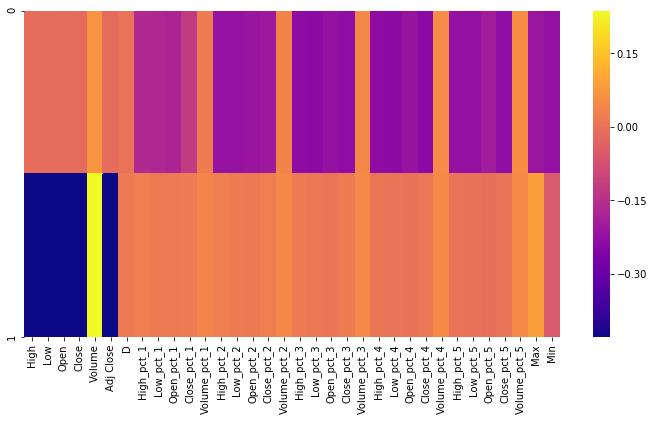

In [44]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [45]:
from sklearn.cluster import KMeans
clusters=3
samples=len(dax)
kmeans = KMeans(n_clusters=clusters)
kmeans.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
import random
pred_point=x_pca[len(x_pca)-1].reshape(1,-1)
pred=kmeans.predict(pred_point)

clr ={0: 'blue', 1: 'red',2:  'green', 3: 'yellow', 4: 'orange', 5: 'yellow', 6: 'orange',7: 'pink' }

df1=pd.DataFrame({'x' : x_pca[:,0],'y': x_pca[:,1],'real':dax['y'],'pred' :kmeans.labels_})
df1['diff']=11*df1['real']+13*df1['pred']#g=sns.FacetGrid(df1,col='real',row='pred')
df1.head()

,x,y,real,pred,diff
5,-1.494667,2.495452,0.0,2,26.0
6,0.501201,2.324406,0.0,2,26.0
7,-0.050599,2.352401,0.0,2,26.0
8,-0.095219,2.689276,0.0,2,26.0
9,1.414113,2.519369,0.0,1,13.0


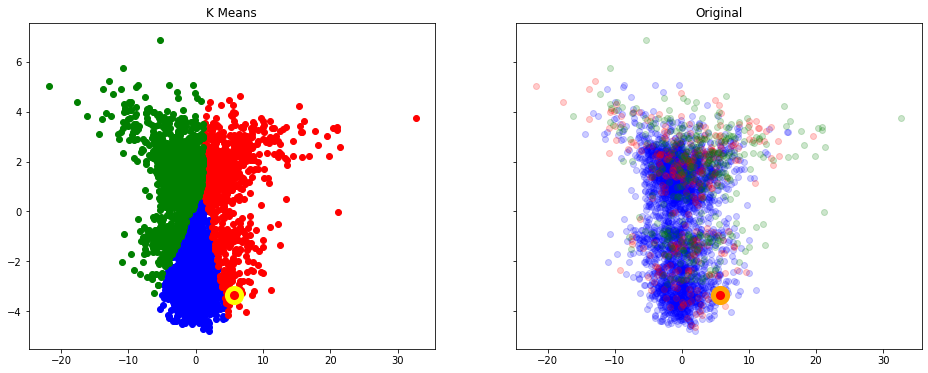

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(16,6))
ax1.set_title('K Means')

for i in range(clusters):
    ax1.scatter(df1[df1['pred']==i]['x'],df1[df1['pred']==i]['y'],c=clr[(i % len(clr))],cmap='rainbow')


ax1.scatter(pred_point[0][0],pred_point[0][1],c=clr[pred[0] % len(clr)],cmap='rainbow',s=200,edgecolors='yellow',linewidths=5,label=pred[0])
ax2.set_title("Original")

for i in range(clusters):
        ax2.scatter(df1[df1['real']==i]['x'],df1[df1['real']==i]['y'],c=clr[(i % len(clr))],cmap='rainbow',alpha=0.2)
ax2.scatter(pred_point[0][0],pred_point[0][1],c=clr[pred[0] % len(clr)],cmap='rainbow',s=200,edgecolors='orange',linewidths=5,label=pred[0])


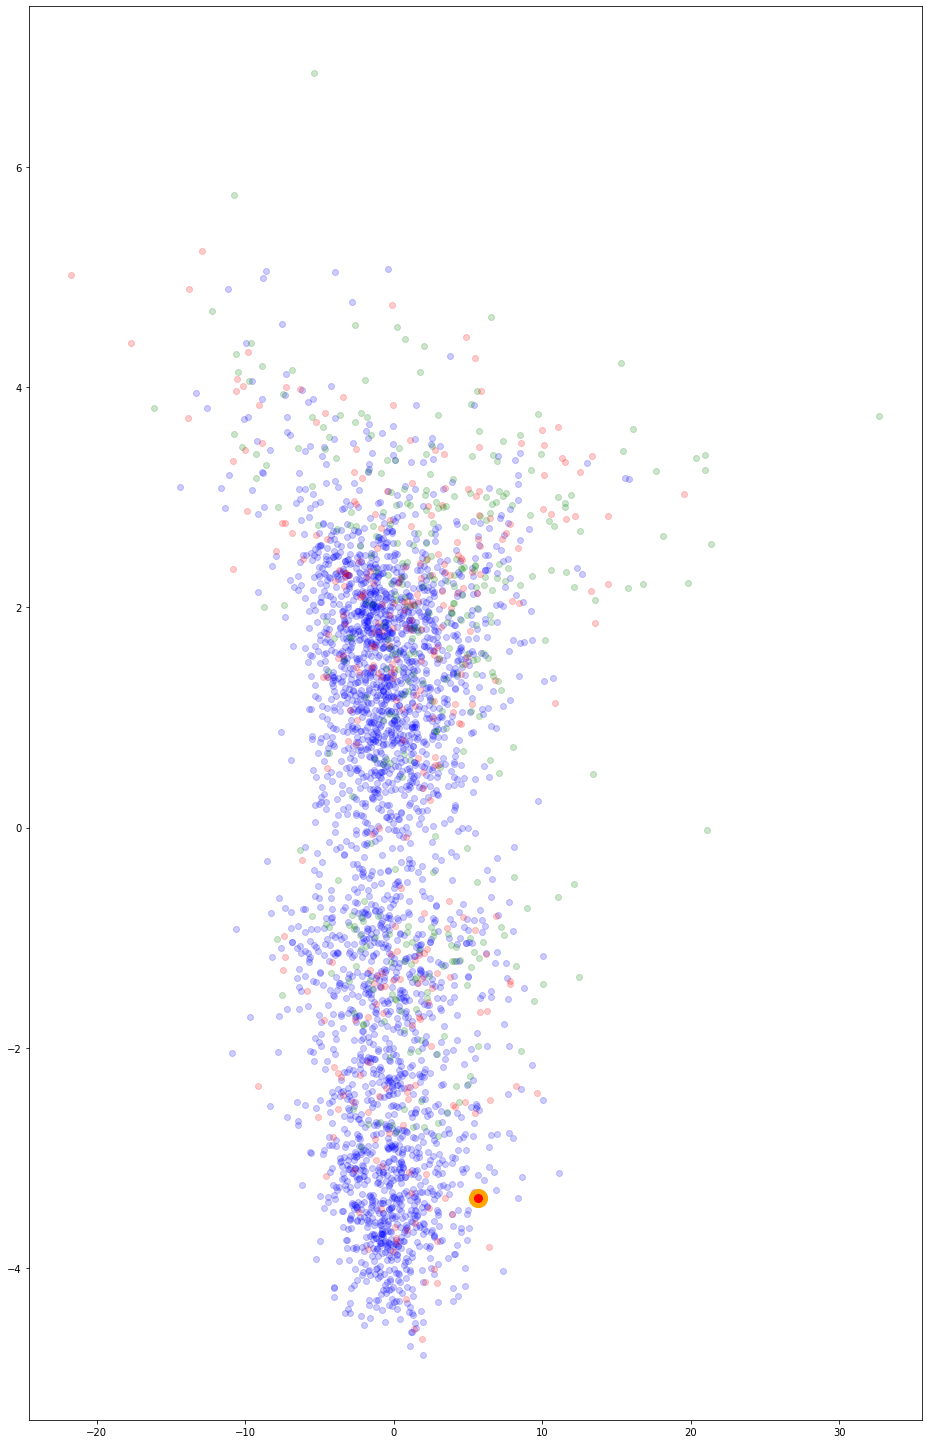

In [48]:
plt.figure(figsize=(16,26))
for i in range(clusters):
        plt.scatter(df1[df1['real']==i]['x'],df1[df1['real']==i]['y'],c=clr[(i % len(clr))],cmap='rainbow',alpha=0.2)
plt.scatter(pred_point[0][0],pred_point[0][1],c=clr[pred[0] % len(clr)],cmap='rainbow',s=200,edgecolors='orange',linewidths=5,label=pred[0])


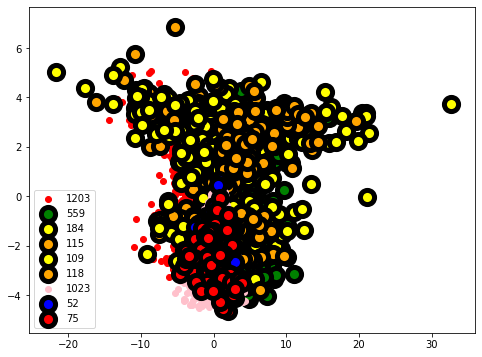

In [49]:
plt.figure(figsize=(8,6))
j=0
for i in df1['diff'].unique():
    if (df1['x'][df1['diff']==i].count()>(0.5*(samples/clusters))):
        j +=1
        plt.scatter(x='x',y='y',c=clr[(j % len(clr))],cmap='rainbow',
                    data=df1[df1['diff']==i],label=df1['x'][df1['diff']==i].count())
    else:
        j +=1
        plt.scatter(x='x',y='y',c=clr[(j % len(clr))],cmap='rainbow',data=df1[df1['diff']==i],
                     label=df1['x'][df1['diff']==i].count(),  
                     edgecolors='black',linewidths=5,s=200)
plt.legend()

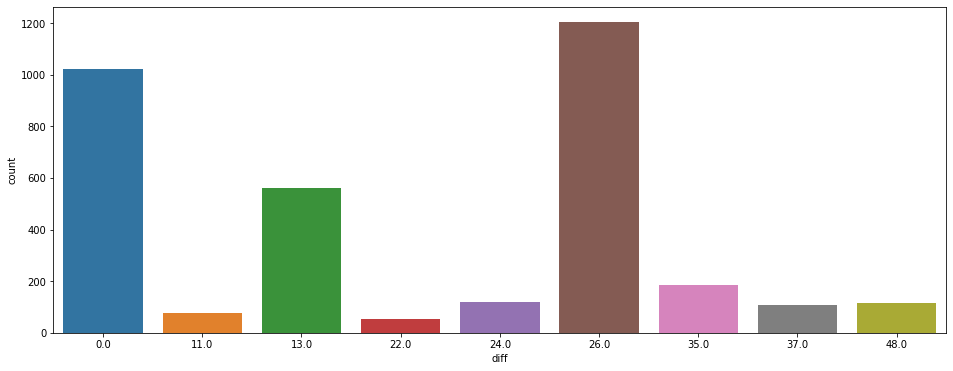

In [50]:
#g=g.map(plt.scatter,'x','y')
plt.figure(figsize=(16,6))
sns.countplot(x='diff',data=df1)


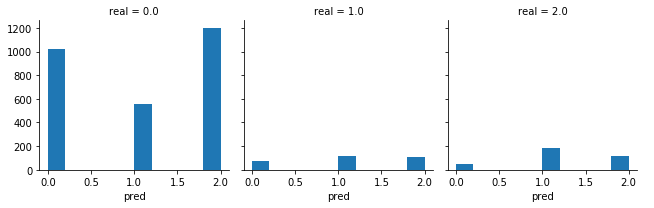

In [51]:
g = sns.FacetGrid(df1, col="real")
g =g.map(plt.hist,'pred').add_legend()